In [9]:
from src.keyword_generator import KeywordGenerator
import os
import pathlib

from dotenv import load_dotenv, find_dotenv
from openai import OpenAI

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np


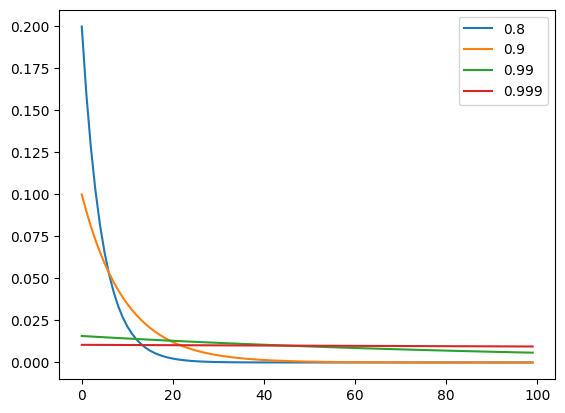

[[0.2        0.10000266 0.01577368 0.01050334]
 [0.16       0.09000239 0.01561594 0.01049283]
 [0.128      0.08100215 0.01545978 0.01048234]
 [0.1024     0.07290194 0.01530518 0.01047186]
 [0.08192    0.06561174 0.01515213 0.01046138]]


In [27]:
# Weights to assign to each (directed) edge based on the position in GPT's response 
w_0 = [0.8,0.9,0.99,0.999]
N = 100
w_f = []
for w in w_0:
    wei = [w**(i+1)/((w**(N+1)-w)/(w-1)) for i in range(100)]
    w_f.append(wei)
w_final = np.array(w_f)
plt.plot(w_final.T)
plt.gca().legend(w_0)
plt.show()

print(w_final.T[0:5,:])

In [30]:
sun = ['sun', 'cloud', 'rain', 'hot']
cloud = ['cloud','grey','sad','sun','weather','sun']
rain = ['rain','water','cloud','cold','weather','snow']
hot = ['hot','sun','temperature','cold','warm','burn']

W = []
for w in sun:
    W.extend(eval(w))

W_unique = []

for x in W:
    if x not in W_unique:
        W_unique.append(x)

print(W)
print(W_unique)

['sun', 'cloud', 'rain', 'hot', 'cloud', 'grey', 'sad', 'sun', 'weather', 'sun', 'rain', 'water', 'cloud', 'cold', 'weather', 'snow', 'hot', 'sun', 'temperature', 'cold', 'warm', 'burn']
['sun', 'cloud', 'rain', 'hot', 'grey', 'sad', 'weather', 'water', 'cold', 'snow', 'temperature', 'warm', 'burn']


In [45]:
wei = 0.5
G = nx.DiGraph()
lists = [sun, cloud, rain, hot]
for e, w in enumerate(lists):
    N = len(w)-1
    for i, w1 in enumerate(w):
        if i>0:
            G.add_edge(w[0], w1, weight = wei**(i-1)/((wei**(N+1)-wei)/(wei-1)))



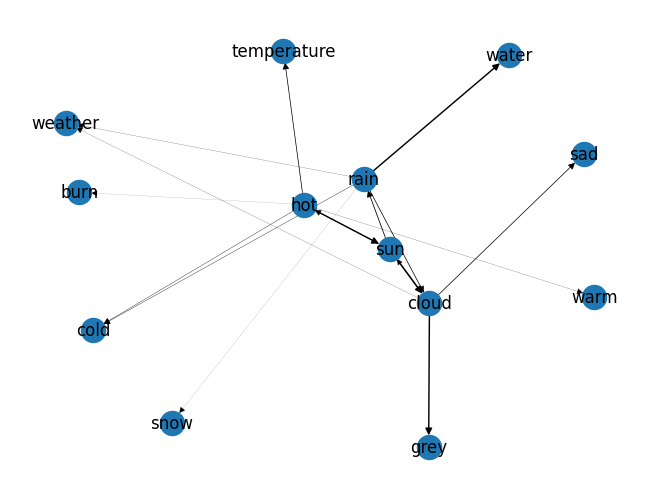

In [46]:
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, with_labels=True, width=edge_widths)

In [40]:
personalization = {node: 0 for node in G.nodes()} 
personalization['sun'] = 1 
pagerank_scores = nx.pagerank(G, personalization=personalization)

scores = pagerank_scores
sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
sorted_scores

[('sun', 0.3996191756037629),
 ('cloud', 0.14641489612306033),
 ('rain', 0.11280758415321393),
 ('hot', 0.10152682573789254),
 ('weather', 0.044686411364297844),
 ('grey', 0.037883636821003465),
 ('cold', 0.03603506247932666),
 ('sad', 0.034095273138903114),
 ('water', 0.023414595503136234),
 ('temperature', 0.018965822357540348),
 ('warm', 0.015362316109607687),
 ('snow', 0.015362316109607683),
 ('burn', 0.013826084498646916)]

In [43]:
personalization = {node: 0 for node in G.nodes()} 
personalization['sun'] = 1 
pagerank_scores = nx.pagerank(G, personalization=personalization)

scores = pagerank_scores
sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
sorted_scores

[('sun', 0.38886641502071106),
 ('cloud', 0.30005923538270646),
 ('grey', 0.23163630822515996),
 ('rain', 0.029778114691952035),
 ('sad', 0.023163630822515994),
 ('water', 0.022780884631861016),
 ('hot', 0.0029778114691952034),
 ('weather', 0.000254417192857021),
 ('cold', 0.00025058973095047117),
 ('temperature', 0.00022780884631861022),
 ('warm', 2.2780884631861025e-06),
 ('snow', 2.278088463186102e-06),
 ('burn', 2.2780884631861022e-07)]

NameError: name 'kw_generator' is not defined